# ***Global Superstores Sales***

In [ ]:
#Load Libraries
import pandas as pd # use for Data manipulation
import numpy as np   #Use to handle matrix or array
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns    #For data visualization
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)     # Display all columns
pd.set_option('display.max_rows', None)        # Display all rows
data = pd.read_csv('/content/Global-Superstore.csv', encoding='latin-1')  # used to read csv file
data.head(3)

Row ID        Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298  CA-2012-124891   7/31/2012   7/31/2012      Same Day    RH-19495   
1   26341   IN-2013-77878    2/5/2013    2/7/2013  Second Class    JR-16210   
2   25330   IN-2013-71249  10/17/2013  10/18/2013   First Class    CR-12730   

   Customer Name    Segment           City            State        Country  \
0    Rick Hansen   Consumer  New York City         New York  United States   
1  Justin Ritter  Corporate     Wollongong  New South Wales      Australia   
2   Craig Reiter   Consumer       Brisbane       Queensland      Australia   

   Postal Code Market   Region       Product ID    Category Sub-Category  \
0      10024.0     US     East  TEC-AC-10003033  Technology  Accessories   
1          NaN   APAC  Oceania  FUR-CH-10003950   Furniture       Chairs   
2          NaN   APAC  Oceania  TEC-PH-10004664  Technology       Phones   

                                        Product Name     Sales  Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650       7.0   
1          Novimex Executive Leather Armchair, Black  3709.395       9.0   
2                  Nokia Smart Phone, with Caller ID  5175.171       9.0   

   Discount    Profit  Shipping Cost Order Priority  
0       0.0  762.1845         933.57       Critical  
1       0.1 -288.7650         923.63       Critical  
2       0.1  919.9710         915.49         Medium

In [ ]:
data.shape  # To know about data shape (columns and rows)

(22282, 24)

In [ ]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity          float64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [ ]:
data.isnull().sum()  # here we know about null values

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       18671
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              1
Discount              1
Profit                1
Shipping Cost         1
Order Priority        1
dtype: int64

In [ ]:
data = data.drop('Postal Code', axis=1) # Drop postal code cause it hsa a lot of null values


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22282 entries, 0 to 22281
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          22282 non-null  int64  
 1   Order ID        22282 non-null  object 
 2   Order Date      22282 non-null  object 
 3   Ship Date       22282 non-null  object 
 4   Ship Mode       22282 non-null  object 
 5   Customer ID     22282 non-null  object 
 6   Customer Name   22282 non-null  object 
 7   Segment         22282 non-null  object 
 8   City            22282 non-null  object 
 9   State           22282 non-null  object 
 10  Country         22282 non-null  object 
 11  Market          22282 non-null  object 
 12  Region          22282 non-null  object 
 13  Product ID      22282 non-null  object 
 14  Category        22282 non-null  object 
 15  Sub-Category    22282 non-null  object 
 16  Product Name    22282 non-null  object 
 17  Sales           22282 non-null 

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data['Order ID'].duplicated().sum()

np.int64(7397)

In [ ]:
line_items_per_order = data.groupby('Order ID').size()
line_items_per_order.describe()

count    14885.000000
mean         1.496943
std          0.880341
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
dtype: float64

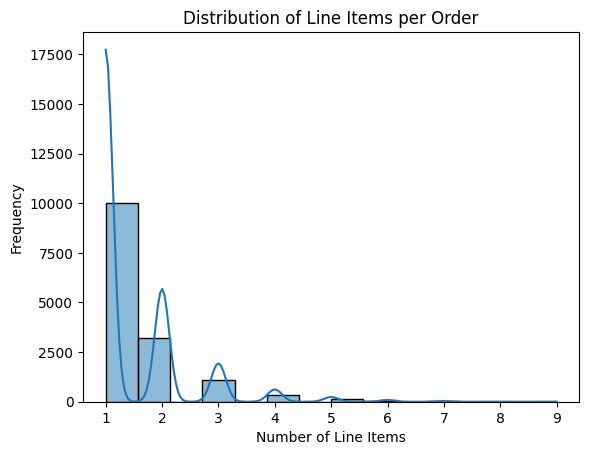

In [ ]:
# Distribution of Line Items per order

sns.histplot(line_items_per_order, bins=14, kde=True)
plt.title('Distribution of Line Items per Order')
plt.xlabel('Number of Line Items')
plt.ylabel('Frequency')
plt.show()

In [ ]:

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [ ]:
#Shipping Duration in days
data['Shipping Duration'] = (data['Ship Date'] - data['Order Date']).dt.days
 # Month and Year from order date
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

data['Shipping Duration'].head(3)

0    0
1    2
2    1
Name: Shipping Duration, dtype: int64

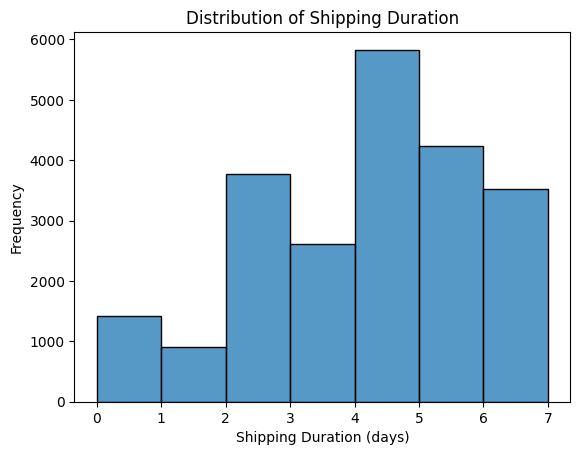

In [ ]:
sns.histplot(data['Shipping Duration'], bins=range(0, data['Shipping Duration'].max()+1,1))
plt.title('Distribution of Shipping Duration')
plt.xlabel('Shipping Duration (days)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Category', ylabel='Profit'>

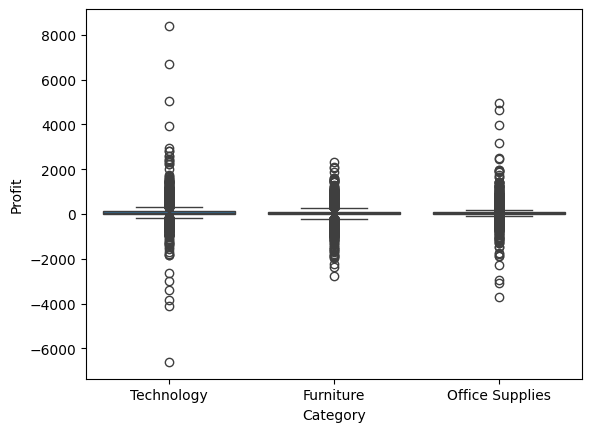

In [ ]:
sns.boxplot(x='Category', y='Profit', data=data)


In [ ]:
Q1 = data['Profit'].quantile(0.25)
Q3 = data['Profit'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Profit'] < Q1 - 1.5 * IQR) | (data['Profit'] > Q3 + 1.5 * IQR)]
print("Number of outliers:", len(outliers))


Number of outliers: 3437


<Axes: xlabel='Category', ylabel='Profit'>

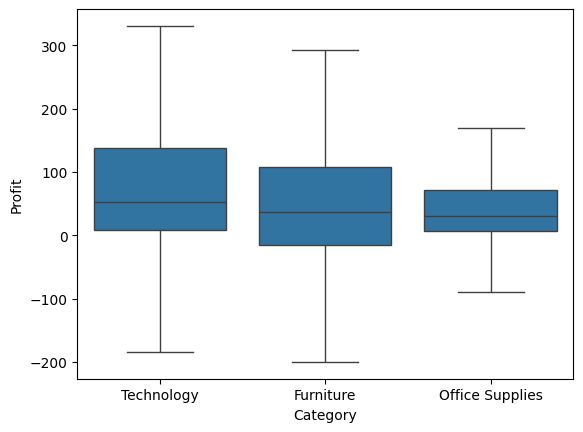

In [ ]:
sns.boxplot(x='Category', y='Profit', data=data, showfliers=False)


In [ ]:
def mad_zscore(x):
  median = np.median(x)
  mad = np.median(np.abs(x - median))
  return 0.6745 *(x - median)/ mad

data['Profit_z_mad'] = mad_zscore(data['Profit'])
data['Is_Profit_Outlier'] = data['Profit_z_mad']. abs() > 4

In [ ]:
# which category sales most
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending = False)
print(category_sales)

Category
Technology         4.463469e+06
Furniture          3.843347e+06
Office Supplies    2.799446e+06
Name: Sales, dtype: float64


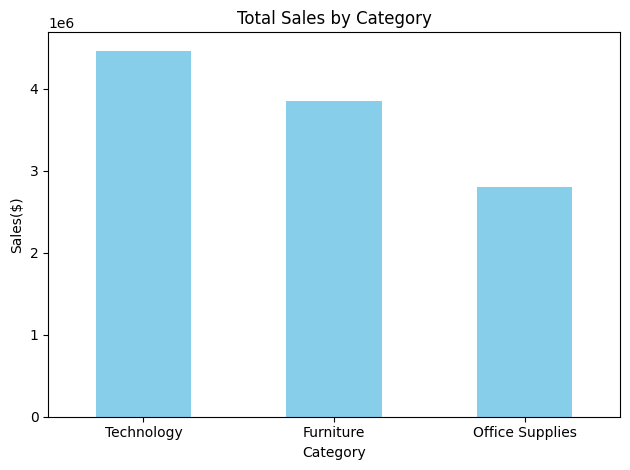

In [ ]:
category_sales.plot(kind ='bar', color ='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Sales($)')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [ ]:
#which region earn most
region_profit = data.groupby('Region')['Profit'].sum().sort_values(ascending = False)
print(region_profit)

Region
Central           279248.79806
North             173708.73524
North Asia        153461.31900
South             127091.89230
Central Asia      122916.01000
Oceania           111882.61200
Africa             98535.34500
West               89384.31730
East               76810.23710
EMEA               59402.20800
Caribbean          29878.89488
Southeast Asia     28142.19870
Canada             14819.55000
Name: Profit, dtype: float64


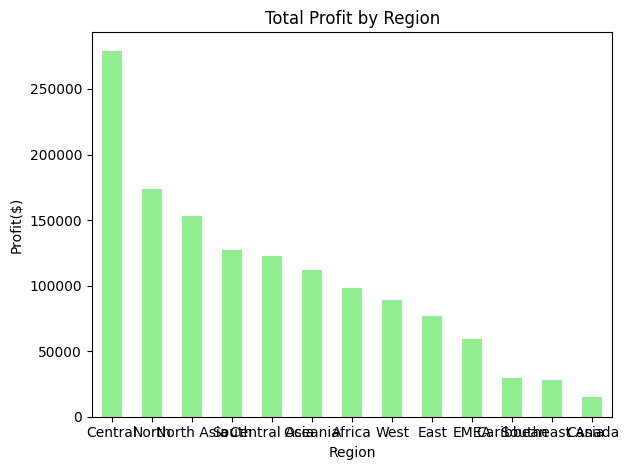

In [ ]:
region_profit.plot(kind ='bar', color ='lightgreen')
plt.title('Total Profit by Region')
plt.ylabel('Profit($)')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

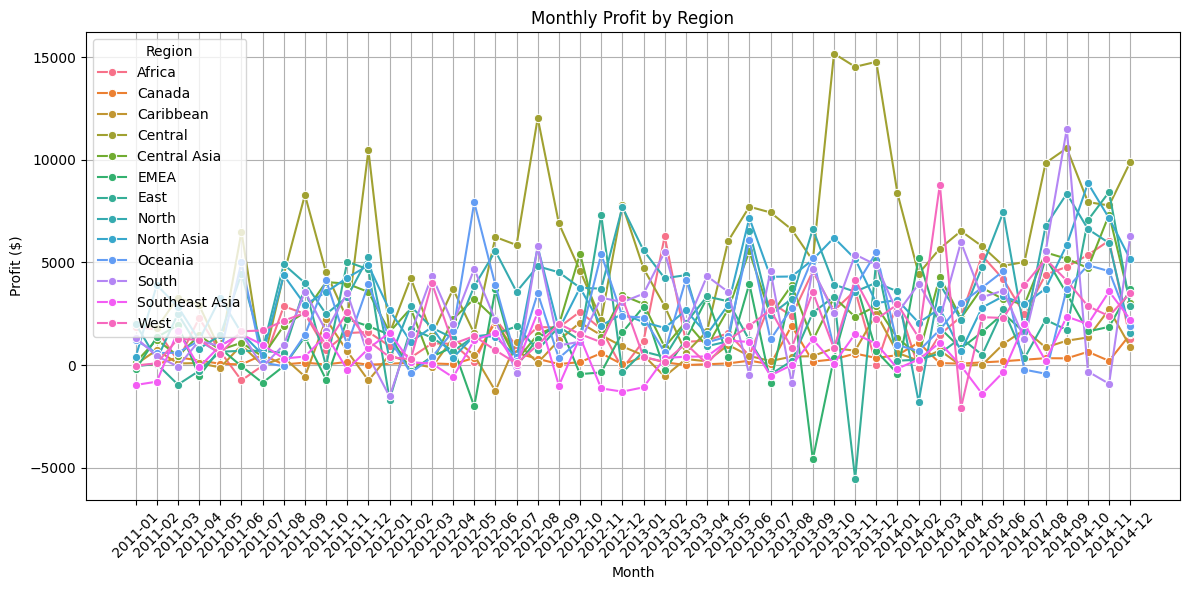

In [ ]:
#It  Ensure dates are datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['YearMonth'] = data['Order Date'].dt.to_period('M')

# Group by Region and Month
monthly_profit = data.groupby(['YearMonth', 'Region'])['Profit'].sum().reset_index()
monthly_profit['YearMonth'] = monthly_profit['YearMonth'].astype(str)

# Plot line graph with one line per region
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_profit, x='YearMonth', y='Profit', hue='Region', marker='o')
plt.title('Monthly Profit by Region')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

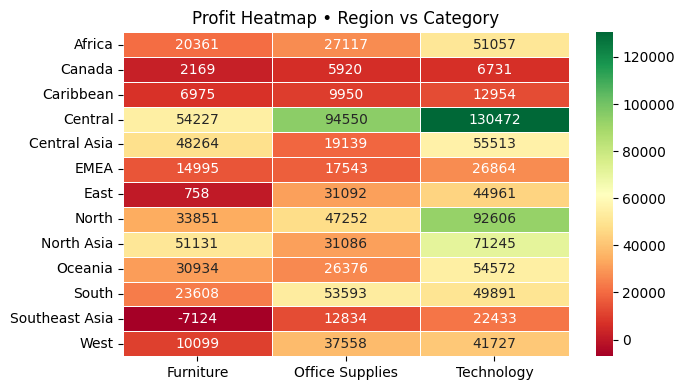

In [ ]:
# Build a pivot table of total Profit
pivot = data.pivot_table(values='Profit',
                       index='Region',       # rows
                       columns='Category',   # columns
                       aggfunc='sum')

# 3. Plot
plt.figure(figsize=(7,4))
sns.heatmap(pivot,
            cmap='RdYlGn',            # green = +profit, red = loss
            annot=True, fmt='.0f',    # show dollar values
            linewidths=.5, linecolor='white')
plt.title('Profit Heatmap • Region vs Category')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

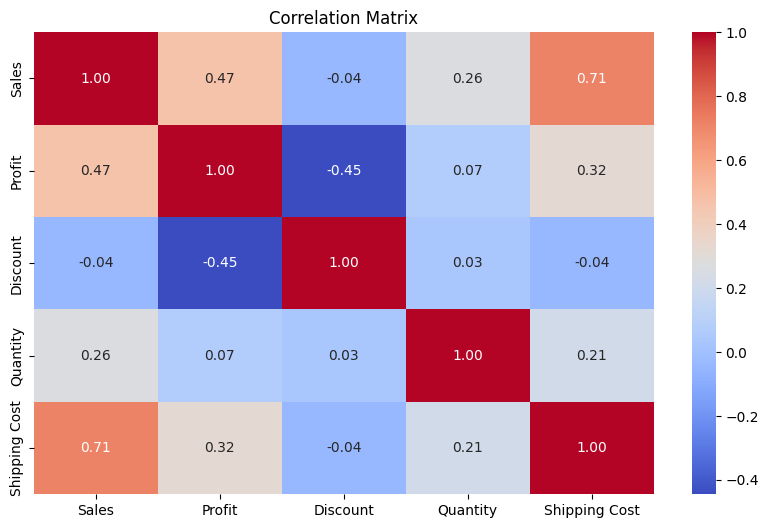

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = data[['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping Cost']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Report
This notebook successfully performed data cleaning,exploration, and visualization on the global superstore dataset. Key findings were drawn from visual analyses using charts,line graphs, heatmaps, and boxplots(for finding outliers).
I identified the top-performing categories,observed profit trends overtime,explored shipping durations, and detected patterns in regional and categorical performance.These insights provide a strong foundation for buiding predictive models in the next phase of the project.